In [ ]:
!jt -t gruvboxd -T -nfs 10 -ofs 12
# !jt -t gruvboxd -tfs 14 -nfs 115 -cellw 80% -T -cursc r -cursw 5 -dfs 8 -N
# !jt -r

In [ ]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

### scikit-ika

TODO: LOGO

A real-time adaptive predictive system for evolving data streams. Inspired by scikit-multiflow, following Scikit's philosophy.

In [1]:
pip install scikit-ika

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import skika
print(f"Hello {skika.__name__}")

Hello skika


In [2]:
pip show -f scikit-ika

Name: scikit-ika
Version: 0.0.3
Summary: real-time lifelong machine learning
Home-page: https://github.com/scikit-ika/scikit-ika
Author: The Ika Team
Author-email: 
License: UNKNOWN
Location: /Users/oceanwu/git/demo/venv/lib/python3.7/site-packages
Requires: 
Required-by: 
Files:
  pearl.cpython-37m-darwin.so
  scikit_ika-0.0.3.dist-info/INSTALLER
  scikit_ika-0.0.3.dist-info/LICENSE
  scikit_ika-0.0.3.dist-info/METADATA
  scikit_ika-0.0.3.dist-info/RECORD
  scikit_ika-0.0.3.dist-info/WHEEL
  scikit_ika-0.0.3.dist-info/top_level.txt
  skika/__init__.py
  skika/__pycache__/__init__.cpython-37.pyc
Note: you may need to restart the kernel to use updated packages.


## PEARL

Probabilistic Exact Adaptive Random Forest with Lossy Counting

Data streams are infinite sequences of items, with a temporal order.
#### Problems with Data Streams
* Stream data is large and fast, therefore we need to extract information in _real time_.
* Stream data may be evolving, so our models have to adapt when there are _changes_ in the data.
        warning: awesomeness ahead

### PEARL Architecture

<center>
<img src="img/architecture.svg"  class=filter-invert width="1200" height="1200">
</center>

### Probabilistic Graphical Model

<center><img src="img/graph.svg"  class=filter-invert width="800" height="800"/></center>

### Lossy Counting

The Lossy Counting algorithm computes _approximate frequency counts_ of elements in a data stream.

Its key idea is _NOT_ to keep the items with _very low frequency_. This can mitigate the side effects from wrong tree transitions!

<center>
<img src="img/lossy-count.svg"  class=filter-invert width="1200" height="1200">
</center>

### Case Study: Monitoring Gas Sensors

#### Data Set Information

* This dataset has recordings of a gas sensor array composed of 8 MOX gas sensors, and a temperature and humidity sensor.
* This sensor array was exposed to background home activity while subject to two different stimuli: wine and banana.
* Goal: discriminate among background, wine and banana.

### Case Study: Predicting Forest Cover Type

#### Data Set Information

* Forest cover type is natural resource inventory information often economically or legally impossible to collect. Vital to any private, state, or federal land management agency.
* Collected from four wilderness areas located in the Roosevelt National Forest of northern Colorado. 
* Contains variables such as wilderness areas and soil type.

In [27]:
from pearl import pearl

num_trees = 60
max_num_candidate_trees = 120
repo_size = 9000
edit_distance_threshold = 90
kappa_window = 50
lossy_window_size = 100000000
reuse_window_size = 0
max_features = -1
bg_kappa_threshold = 0
cd_kappa_threshold = 0.4
reuse_rate_upper_bound = 0.18
warning_delta = 0.0001
drift_delta = 0.00001
enable_state_adaption = True
enable_state_graph = True

classifier = pearl(num_trees,
              max_num_candidate_trees,
              repo_size,
              edit_distance_threshold,
              kappa_window,
              lossy_window_size,
              reuse_window_size,
              max_features,
              bg_kappa_threshold,
              cd_kappa_threshold,
              reuse_rate_upper_bound,
              warning_delta,
              drift_delta,
              enable_state_adaption,
              enable_state_graph)

print("pearl initialized")

enable_state_adaption = False
enable_state_graph = False

arf = pearl(num_trees,
              max_num_candidate_trees,
              repo_size,
              edit_distance_threshold,
              kappa_window,
              lossy_window_size,
              reuse_window_size,
              max_features,
              bg_kappa_threshold,
              cd_kappa_threshold,
              reuse_rate_upper_bound,
              warning_delta,
              drift_delta,
              enable_state_adaption,
              enable_state_graph)

print("ARF initialized")

pearl initialized
ARF initialized


<IPython.core.display.Javascript object>


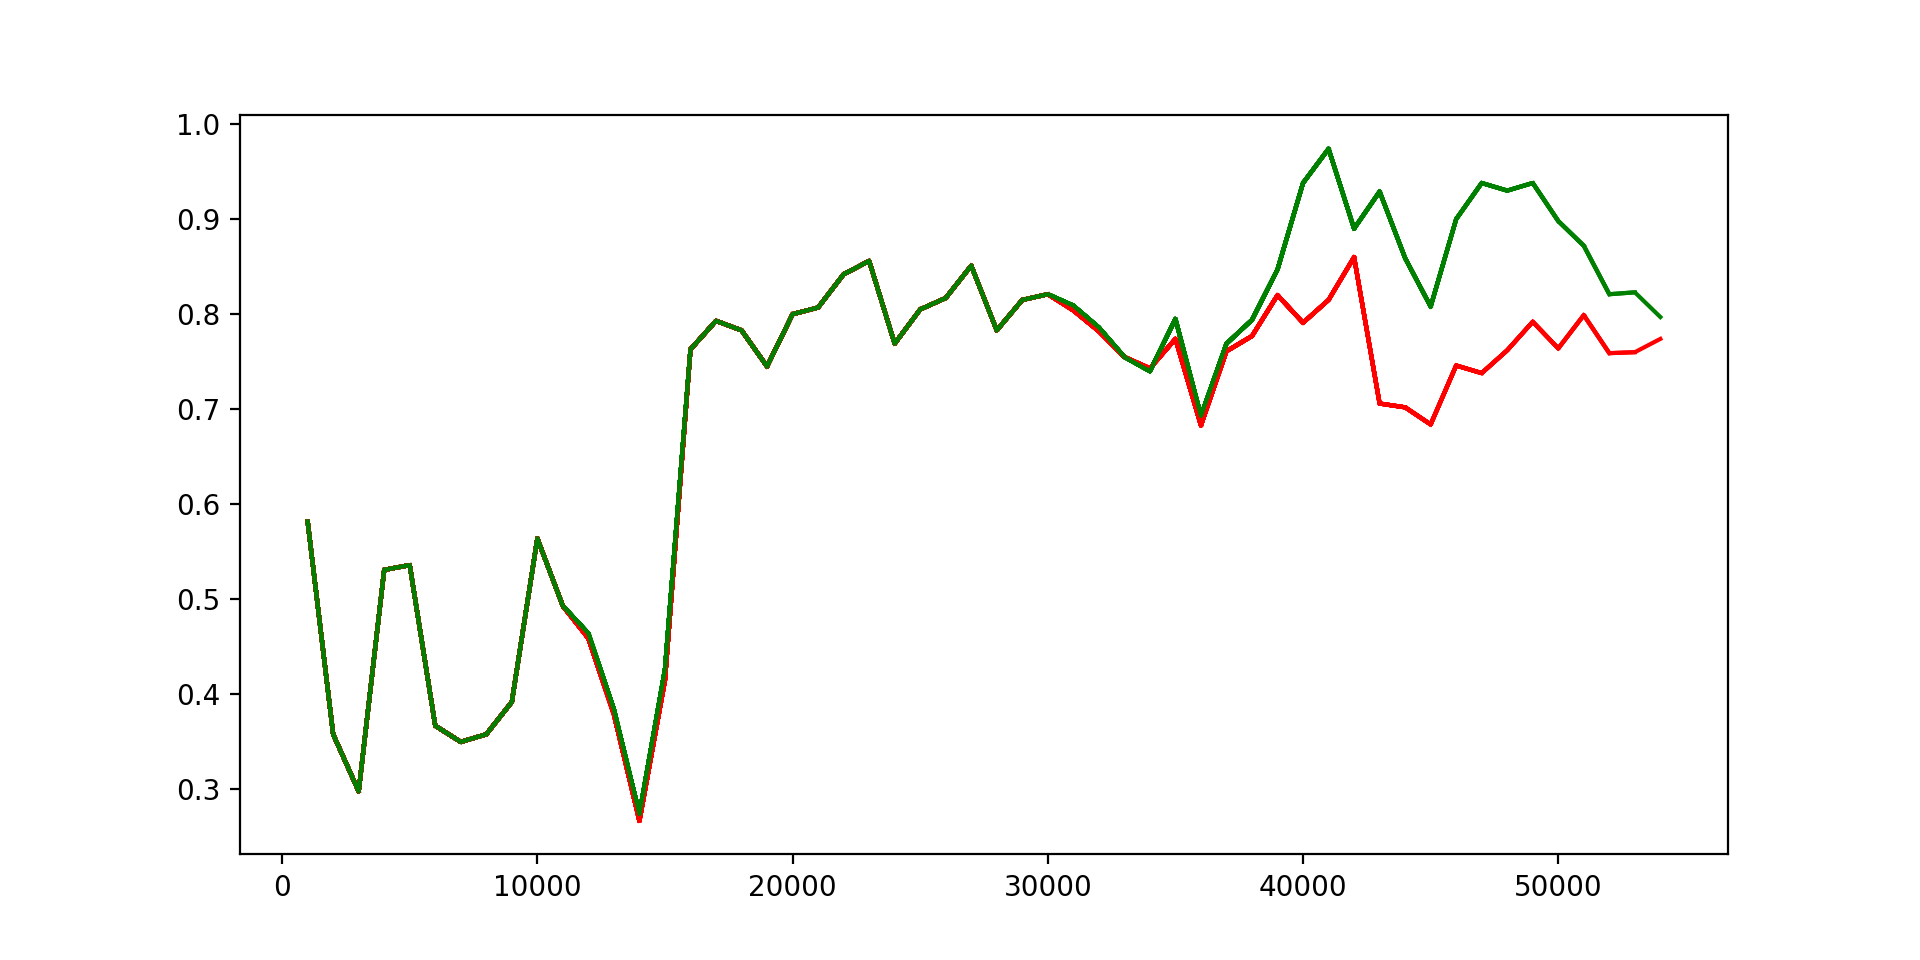

In [7]:
%matplotlib notebook

from matplotlib import pyplot as plt
from matplotlib import animation
from pearl import pearl


class evaluate(object):

    def __init__(self, enable_state_adaption=False, enable_state_graph=False):
        self.accuracy = 0
        self.num_instances = 0

        num_trees = 60
        max_num_candidate_trees = 120
        repo_size = 9000
        edit_distance_threshold = 90
        kappa_window = 50
        lossy_window_size = 100000000
        reuse_window_size = 0
        max_features = -1
        bg_kappa_threshold = 0
        cd_kappa_threshold = 0.4
        reuse_rate_upper_bound = 0.18
        warning_delta = 0.0001
        drift_delta = 0.00001

        self.classifier = pearl(num_trees,
                          max_num_candidate_trees,
                          repo_size,
                          edit_distance_threshold,
                          kappa_window,
                          lossy_window_size,
                          reuse_window_size,
                          max_features,
                          bg_kappa_threshold,
                          cd_kappa_threshold,
                          reuse_rate_upper_bound,
                          warning_delta,
                          drift_delta,
                          enable_state_adaption,
                          enable_state_graph)

        self.classifier.init_data_source("data/covtype.arff");

    def __call__(self):

        correct = 0

        sample_freq = 1000

        for count in range(0, sample_freq):
            if not self.classifier.get_next_instance():
                break

            # test
            prediction = self.classifier.predict()

            actual_label = self.classifier.get_cur_instance_label()
            if prediction == actual_label:
                correct += 1

            # train
            self.classifier.train()

            self.classifier.delete_cur_instance()

        self.accuracy = correct / sample_freq
        candidate_tree_size = self.classifier.get_candidate_tree_group_size()
        tree_pool_size = self.classifier.get_tree_pool_size()

        self.num_instances += 1000
        return self.num_instances, self.accuracy

arf = evaluate()
pearl = evaluate(True, True)


fig = plt.figure()

x_arf = []
y_arf = []
x_pearl = []
y_pearl = []

max_samples = 580000

def frames_arf():
    for i in range(max_samples):
        yield arf()

def animate_arf(args):
    x_arf.append(args[0])
    y_arf.append(args[1])
    return plt.plot(x_arf, y_arf, color='r')

def frames_pearl():
    for i in range(max_samples):
        yield pearl()

def animate_pearl(args):
    x_pearl.append(args[0])
    y_pearl.append(args[1])
    return plt.plot(x_pearl, y_pearl, color='g')

anim_arf = animation.FuncAnimation(fig, animate_arf, frames=frames_arf, interval=1000)
anim_pearl = animation.FuncAnimation(fig, animate_pearl, frames=frames_pearl, interval=1000)

F = plt.gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*1.5, Size[1]*1, forward=True)
plt.show()

## Covtype Results

<center>
<img src="img/covtype-results.svg" class="filter-invert" width="1200" height="1200">
</center>

# Questions